# Sediment concentration at the boundaries

What is the sediment concentration at the river inflow and outflow? When has this reached a balance?

## Delta visualisation

What does the delta look like and what cross-sections are we looking at?

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import dfm_tools as dfmt
from interactive import *

trim500 = "Mahakam_500/Mahakam/Mahakam_delta_Netcdf/trim-001.nc"
trih500 = "Mahakam_500/Mahakam/Mahakam_delta_Netcdf/trih-001.nc"

Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.02.08.000000 from Nov 20 2016), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.


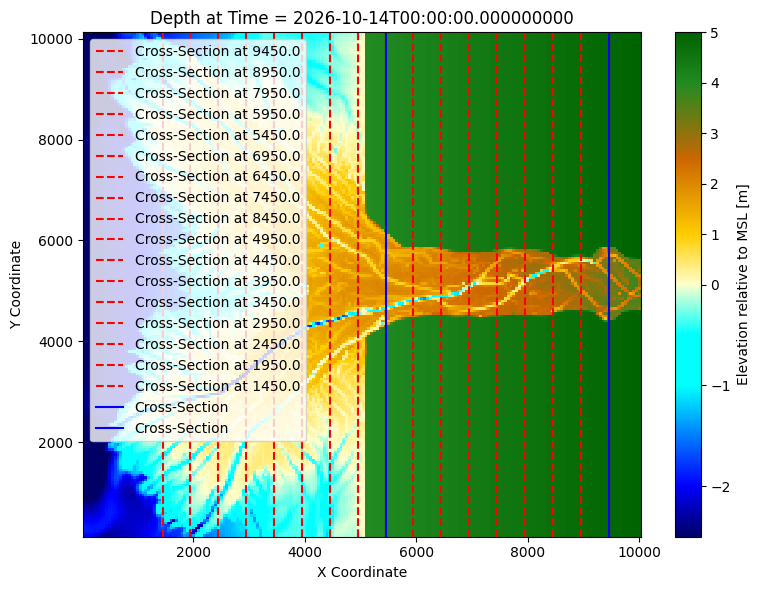

In [8]:
nc_file = trim500
time_index=-1
vmin=-2.5
vmax=5
vcenter=0

left_cross = 0
middle_cross = 4   # Indexes for the rivers

# Load the NetCDF file
dataset = xr.open_dataset(nc_file)

# Extract coordinates and depth data
xc = dataset["XCOR"].values
yc = dataset["YCOR"].values
depth = dataset["DPS"]

# Trim the edges
xc_inner = xc[1:-1, 1:-1]
yc_inner = yc[1:-1, 1:-1]
depth_inner = depth[:, 1:-1, 1:-1] * -1  # Flip sign for elevation

# Time values
time_values = dataset["time"].values
depth_at_t = depth_inner[time_index, :, :]

# Define sharp sea-level-transition colormap
colors = [
    (0.00, "#000066"),   # deep water
    (0.10, "#0000ff"),   # blue
    (0.30, "#00ffff"),   # cyan
    (0.40, "#00ffff"),  # water edge
    (0.50, "#ffffcc"),  # land edge
    (0.60, "#ffcc00"),   # orange
    (0.75, "#cc6600"),   # brown
    (0.90, "#228B22"),   # green
    (1.00, "#006400"),   # dark green
]
terrain_like = LinearSegmentedColormap.from_list("custom_terrain", colors)
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

# Open Trih files
ds_his = xr.open_mfdataset(trih500, preprocess=dfmt.preprocess_hisnc, decode_timedelta=True)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(xc_inner, yc_inner, depth_at_t, shading='auto', cmap=terrain_like, norm=norm)
for i in range(17):
    ax.axvline(ds_his.XYTRA[i].values[0], color='r', linestyle='--', label=f'Cross-Section at {ds_his.XYTRA[i].values[0]}')


# rando = 9
ax.axvline(ds_his.XYTRA[left_cross].values[0], color='b', linestyle='-', label=f'Cross-Section')
ax.axvline(ds_his.XYTRA[middle_cross].values[0], color='b', linestyle='-', label=f'Cross-Section')
# ax.axvline(ds_his.XYTRA[rando].values[0], color='y', linestyle='-', label=f'Cross-Section')

ax.set_title(f'Depth at Time = {time_values[time_index]}')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

cb = fig.colorbar(c, ax=ax, orientation='vertical', label='Elevation relative to MSL [m]')
plt.legend()
plt.tight_layout()
plt.show()

dataset.close()

Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.02.08.000000 from Nov 20 2016), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.
Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.02.08.000000 from Nov 20 2016), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.
Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.02.08.000000 from Nov 20 2016), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.


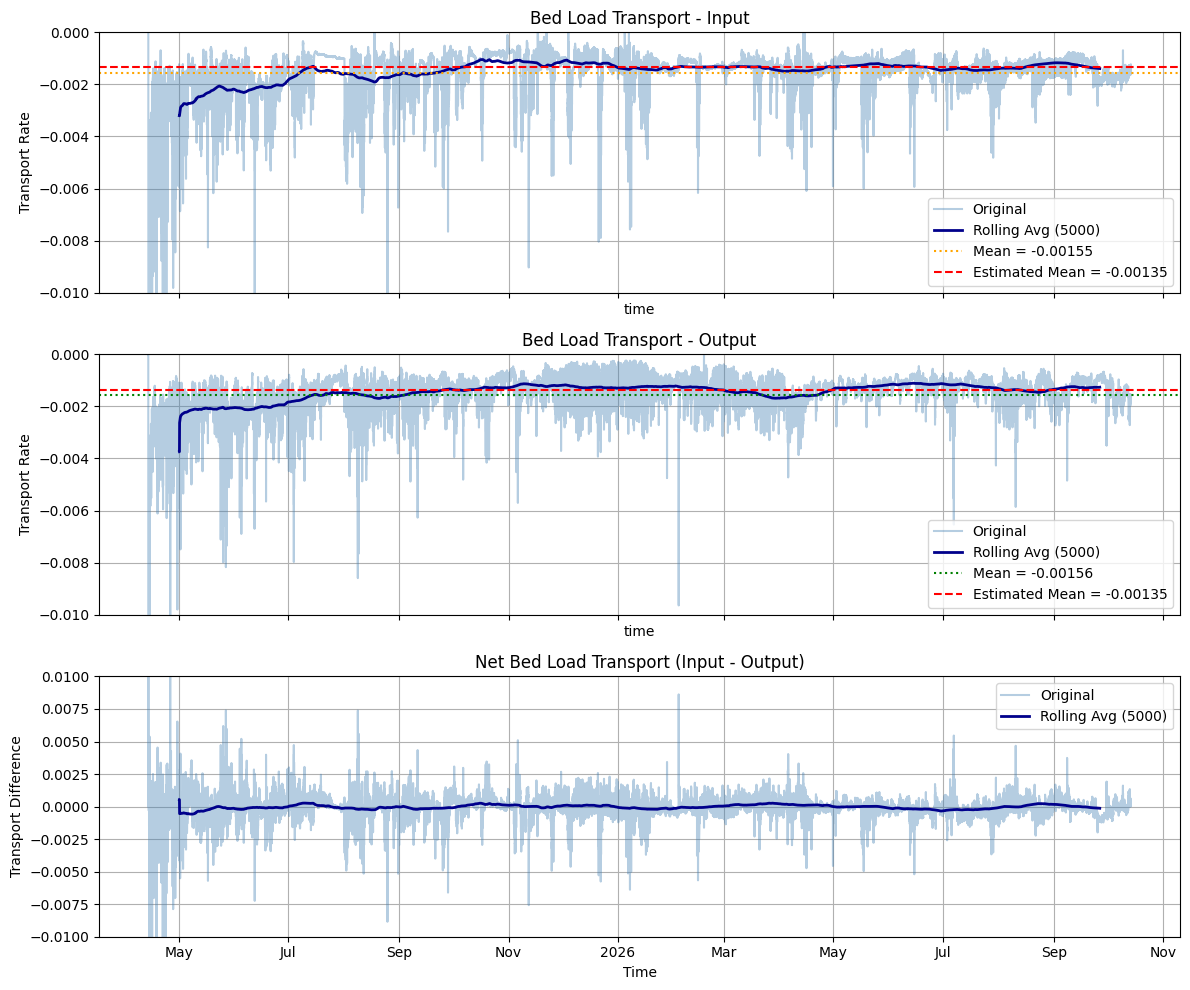

In [9]:
ds_his = xr.open_mfdataset(trih500, preprocess=dfmt.preprocess_hisnc, decode_timedelta=True)

rol_ave = 5000

# Initialize figure
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Input
bedload_left = ds_his.SBTR[:, 0, left_cross]
mean_left = Calculate_Q(trih500, boundary=left_cross)
bedload_left_rolling = bedload_left.rolling(time=rol_ave, center=True).mean()

bedload_left.plot(ax=axes[0], label='Original', alpha=0.4, color='steelblue')
bedload_left_rolling.plot(ax=axes[0], label=f'Rolling Avg ({rol_ave})', color='darkblue', linewidth=2)

axes[0].axhline(y=mean_left, color='orange', linestyle=':', linewidth=1.5, label=f'Mean = {mean_left:.5f}')
axes[0].axhline(y=-0.00135, color='red', linestyle='--', linewidth=1.5, label='Estimated Mean = -0.00135')

axes[0].set_ylim(-0.01, 0)
axes[0].set_ylabel('Transport Rate')
axes[0].set_title('Bed Load Transport - Input')
axes[0].legend()
axes[0].grid(True)

# Output
bedload_middle = ds_his.SBTR[:, 0, middle_cross]
mean_middle = Calculate_Q(trih500, boundary=middle_cross)
bedload_middle_rolling = bedload_middle.rolling(time=rol_ave, center=True).mean()

bedload_middle.plot(ax=axes[1], label='Original', alpha=0.4, color='steelblue')
bedload_middle_rolling.plot(ax=axes[1], label=f'Rolling Avg ({rol_ave})', color='darkblue', linewidth=2)

axes[1].axhline(y=mean_middle, color='green', linestyle=':', linewidth=1.5, label=f'Mean = {mean_middle:.5f}')
axes[1].axhline(y=-0.00135, color='red', linestyle='--', linewidth=1.5, label='Estimated Mean = -0.00135')

axes[1].set_ylim(-0.01, 0)
axes[1].set_ylabel('Transport Rate')
axes[1].set_title('Bed Load Transport - Output')
axes[1].legend()
axes[1].grid()

# Difference (Input - Output)
in_out = bedload_left - bedload_middle
in_out_rolling = in_out.rolling(time=rol_ave, center=True).mean()

in_out.plot(ax=axes[2], label='Original', alpha=0.4, color='steelblue')
in_out_rolling.plot(ax=axes[2], label=f'Rolling Avg ({rol_ave})', color='darkblue', linewidth=2)

axes[2].set_ylim(-0.01, 0.01)
axes[2].set_ylabel('Transport Difference')
axes[2].set_title('Net Bed Load Transport (Input - Output)')
axes[2].legend()
axes[2].grid()

# Final plot adjustments
axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()

## Sediment Transport Analysis 

Based on these graphs the sediment concentration, has largely stabalised, however, It does seem to behave in a random pattern. The Sediment concentration based on these graphs is. The value is positive cause the negative sign only illustrated direction. 

The estimated mean sediment transport rate (**Qs**) estimated from the stabilized portion of the time series is:

- **Qs = 0.00135 m³/s**

- _Note: The value is reported as positive, as the negative sign in the original data simply indicated direction of transport._

This sediment transport rate will be used in subsequent **dredging applications** to inform volume estimates and operational planning.
